In [2]:
import cPickle

# PARAMS
log_dir = "/home/sforesti/avakas/scratch/sforestier001/logs/CogSci2017/2017-01-15_18-30-39-TEST100"


filename = log_dir + '/results/vocal.pickle'
with open(filename, 'r') as f:
    data_vocal = cPickle.load(f)

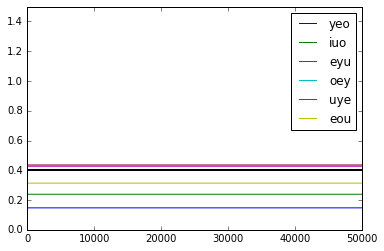

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

config_list = ["RMB"]
n_iter = 100
trial_list = range(1,n_iter + 1) 
config_name = "RMB"


for trial in [3]:
    human_sounds = data_vocal[config_name][trial]["human_sounds"]    
    for hs in human_sounds:
        plt.plot([data_vocal[config_name][trial]["errors"][i][hs] for i in range(len(data_vocal[config_name][trial]["errors"]))], label=hs)
        
plt.ylim([0, 1.5])       
plt.xlim([0, 50000])  
plt.plot((0, 50000), (0.4, 0.4), '-', lw=2)
plt.legend()

In [49]:
ta = 20000

import numpy as np

def time_limit(error_evolution):
    tl = 50000
    while error_evolution[tl] < 0.4:
        tl -= 1
    return tl
    
def synchro(ee_list):
    l = []
    for ee in ee_list:
        tl_ee = time_limit(ee)
        if tl_ee < 50000-ta:
            l += [ee[tl_ee:tl_ee+ta]]
    return l
            
ee_list_s = []
ee_list_ns = []

for trial in trial_list:
    human_sounds = data_vocal[config_name][trial]["human_sounds"]    
    for hs in human_sounds[:3]:
        ee_list_s += [[data_vocal[config_name][trial]["errors"][i][hs] for i in range(len(data_vocal[config_name][trial]["errors"]))]]
        
    for hs in human_sounds[3:]:
        ee_list_ns += [[data_vocal[config_name][trial]["errors"][i][hs] for i in range(len(data_vocal[config_name][trial]["errors"]))]]
        
ee_s_avg = np.mean(synchro(ee_list_s), axis=0)
ee_ns_avg = np.mean(synchro(ee_list_ns), axis=0)
    


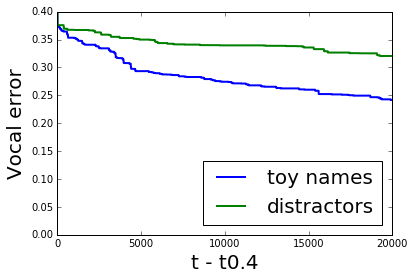

In [51]:
plt.plot(ee_s_avg, label="toy names", lw=2)
plt.plot(ee_ns_avg, label="distractors", lw=2)
    
plt.xlabel("t - t0.4", fontsize=20)
plt.ylabel("Vocal error", fontsize=20)
plt.ylim([0, 0.4])       
plt.xlim([0, ta])  
plt.plot((0, ta), (0.4, 0.4), '-', lw=2)
plt.legend(loc="lower right", fontsize=20)

In [57]:
print np.std(synchro(ee_list_ns), axis=0)

[ 0.04083985  0.02634049  0.02634049 ...,  0.04787319  0.04787319
  0.04787319]


In [59]:
print len(ee_list_ns)
print len(synchro(ee_list_ns))

30
21
